In [2]:
# library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# read csv data
cwd = os.getcwd()
data_path = os.path.join(os.path.dirname(cwd),"data/").replace('/','\\') # for windows

application_train = pd.read_csv(os.path.join(data_path,"application_train.csv"))
application_test = pd.read_csv(os.path.join(data_path,"application_test.csv"))

print("Raw Train data:",len(application_train))
print("Raw Test data:",len(application_test))

Raw Train data: 307511
Raw Test data: 48744


In [4]:
# try get rid of NULL ?
print("Raw Train data (remove NaN):",len(application_train.dropna()))
print("Raw Test data (remove NaN):",len(application_test.dropna()))

## Too many NaN values...

Raw Train data (remove NaN): 8602
Raw Test data (remove NaN): 1739


In [5]:
# rank columns by number of NaN contains
print("Train data")
print(application_train.isnull().astype(int).sum().sort_values(ascending=False))
print("\nTest data")
print(application_test.isnull().astype(int).sum().sort_values(ascending=False))

## Many columns contain NaN values more than 50%

Train data
COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_AVG        213514
FONDKAPREMONT_MODE             210295
LIVINGAPARTMENTS_MEDI          210199
LIVINGAPARTMENTS_MODE          210199
LIVINGAPARTMENTS_AVG           210199
FLOORSMIN_MEDI                 208642
FLOORSMIN_MODE                 208642
FLOORSMIN_AVG                  208642
YEARS_BUILD_MEDI               204488
YEARS_BUILD_AVG                204488
YEARS_BUILD_MODE               204488
OWN_CAR_AGE                    202929
LANDAREA_MODE                  182590
LANDAREA_AVG                   182590
LANDAREA_MEDI                  182590
BASEMENTAREA_MEDI              179943
BASEMENTAREA_AVG               179943
BASEMENTAREA_MODE              179943
EXT_SOURCE_1                   173378
NONLIVINGAREA_MEDI             169682
NONLIVINGAREA_AVG              169682
N

In [6]:
# Get rid of columns that contains NaN values more than 10% , and clear other NaN rows
application_train_fix = application_train.loc[:,application_train.isnull().astype(int).sum()<len(application_train)*0.05].dropna()
application_test_fix = application_test.loc[:,application_train.isnull().astype(int).sum()<len(application_train)*0.05].dropna()

In [7]:
print("Train data:",len(application_train_fix))
print("Test data:",len(application_test_fix))

Train data: 304531
Test data: 47772


In [8]:
# Look at features and dtypes
print(application_train_fix.columns)
print(application_train_fix.dtypes)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [9]:
# Convert to categorical (dummy)
application_train_fix["TARGET"] = application_train_fix["TARGET"].astype('category')
object_to_categorical = [col for col in application_train_fix.columns[application_train_fix.dtypes == object]]
#for col in object_to_categorical:
#    application_train_fix = pd.concat([application_train_fix,pd.get_dummies(application_train_fix[col])])
#    application_test_fix = pd.concat([application_test_fix,pd.get_dummies(application_test_fix[col])])


#dummy = pd.get_dummies(data = titanic_df_main["Sex"],drop_first=True)
#titanic_df_main = titanic_df_main.combine_first(dummy)

application_train_fix = application_train_fix.drop(object_to_categorical,axis=1)
application_test_fix = application_test_fix.drop(object_to_categorical,axis=1)

In [10]:
# create dataset
X = application_train_fix.drop(["SK_ID_CURR","TARGET"],axis=1) #SK_ID_CURR = id
Y = application_train_fix["TARGET"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Random Forest
clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

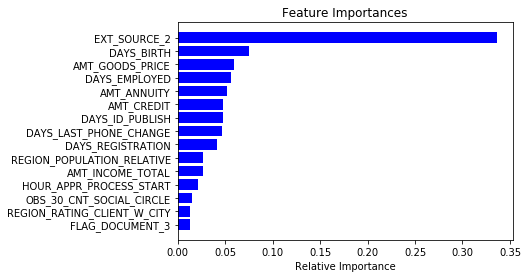

In [34]:
# Features impotance
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices[-15:])), importances[indices[-15:]], color='b', align='center')
plt.yticks(range(len(indices[-15:])), features[indices[-15:]])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
# accuracy by model
print(clf.score(X_test,Y_test))

0.9181210698277702


In [50]:
# accuracy by guessing all negative
print(len(list(filter(lambda x: x==0, Y_test)))/len(Y_test))

0.9181046513537032


### Weigthed Random Forest

In [91]:
# Random Forest
w=10
clf = RandomForestClassifier(max_depth=10, random_state=42,class_weight={0: 1, 1: w})
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [92]:
from sklearn.metrics import confusion_matrix


In [93]:
y_pred = clf.predict(X_test)

In [94]:
tn, fn, fp, tp = confusion_matrix(Y_test, y_pred).ravel()
recall = tp / (tp + fn)
prec = tp / (tp + fp)
F1 = 2 * recall * prec / (recall + prec)
print(recall, prec, F1)
print("Predict","Positive","Negative")
print("Positive",tp,fp )
print("Negative",fn,tn)

print(tp+fp+fn+tn)
# accuracy by model
print(clf.score(X_test,Y_test))

0.156121045392022 0.5006014434643143 0.23801353541130493
Predict Positive Negative
Positive 2497 2491
Negative 13497 42422
60907
0.7375014366164808


In [82]:
print(len(list(filter(lambda x: x==1, Y_test))))
print(len(Y_test))

4988
60907


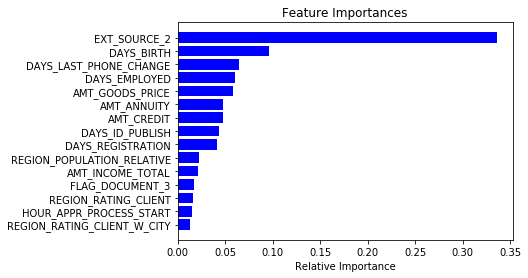

In [95]:
# Features impotance
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices[-15:])), importances[indices[-15:]], color='b', align='center')
plt.yticks(range(len(indices[-15:])), features[indices[-15:]])
plt.xlabel('Relative Importance')
plt.show()

## Data

In [22]:
# create dataset
X = application_train_fix[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]] #SK_ID_CURR = id
Y = application_train_fix["TARGET"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
application_train_fix.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FL

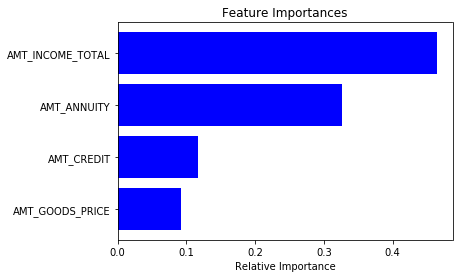

In [24]:
# 小数第３まで表示
%precision 3

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# Features impotance by ExtraTrees
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
# accuracy by model
print(model.score(X_test,Y_test))

0.9002413515687852


In [28]:
sample_submission = pd.read_csv(os.path.join(data_path,"sample_submission.csv"))
sample_submission

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
5,100042,0.5
6,100057,0.5
7,100065,0.5
8,100066,0.5
9,100067,0.5


In [31]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
object_to_categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']